## YEAR BUILT Analysis

BOROUGH                                   object
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                          object
GROSS SQUARE FEET                         object
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE           

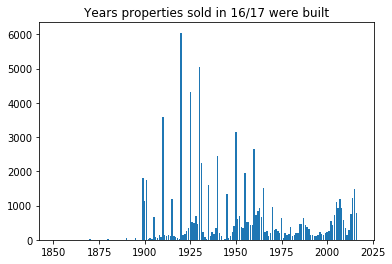

YEAR BUILT    1920
COUNT         6045
Name: 45, dtype: int64

In [25]:
# Imports
import pandas as pd
import functions as fc
import matplotlib.pyplot as plt

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales.csv")


# Dropping some unnecessary information
sales_frame = sales_frame.drop(["Unnamed: 0"], axis=1)
fc.to_csv("data/nyc-rolling-sales1.csv", sales_frame)
# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame pre changing
#print(sales_frame.dtypes)

# Changing format of boroughs to string (from int)
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].apply(str)
# Changing format of sale price to numeric (from str)
sales_frame["SALE PRICE"] = pd.to_numeric(sales_frame["SALE PRICE"], errors="coerce")
# Changing format of sale date to datetime (from str)
sales_frame["SALE DATE"] = pd.to_datetime(sales_frame["SALE DATE"], errors="coerce")

# Replacing numbers of boroughs with actual name
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["1"], "Manhattan")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["2"], "Brooklyn")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["3"], "Queens")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["4"], "The Bronx")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["5"], "Staten Island")

# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame post changing
print(sales_frame.dtypes)

# Filtering sales with "YEAR BUILT" > 1850 (no relevant amount of sales before)
sales_yearbuilt_plausible = sales_frame[sales_frame["YEAR BUILT"] > 1850]

# determining average of column "YEAR BUILT"
sales_yearbuilt_plausible_mean = sales_yearbuilt_plausible["YEAR BUILT"].mean()
print(sales_yearbuilt_plausible_mean)

sales_yearbuilt_plausible_median = sales_yearbuilt_plausible["YEAR BUILT"].median()
print(sales_yearbuilt_plausible_median)

# Amount of Data that is not plausible
sales_yearbuilt_unplausible = sales_frame[sales_frame["YEAR BUILT"] < 1850]
print(len(sales_yearbuilt_unplausible))

# Newest and oldest building by "Year Built"
sales_newest = sales_yearbuilt_plausible["YEAR BUILT"].max()
sales_oldest = sales_yearbuilt_plausible["YEAR BUILT"].min()

print(sales_newest)
print(sales_oldest)

# Getting plausible dataframe with year build and count of properties
year_built_frame = sales_yearbuilt_plausible.groupby(["YEAR BUILT"])
year_built_count = year_built_frame["YEAR BUILT"].count().reset_index(name="Index")
year_built_count.columns = ["YEAR BUILT", "COUNT"]

print(year_built_count)

# Plotting the dataframe
xs = year_built_count["YEAR BUILT"]
ys = year_built_count["COUNT"]

plt.bar(xs, ys)
plt.title("Years properties sold in 16/17 were built")
plt.savefig("data/Years properties sold in 16_17 were built.jpg", bbox_inches="tight")
plt.show()

# determining year with most properties built
year_built_count.iloc[year_built_count["COUNT"].idxmax()]



